In [3]:
#### TASK 5 ####
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

df=pd.read_csv('/content/drive/MyDrive/sql coursework-new/CarSharing.csv')

#fill null values using interpolate()
null_columns=['temp', 'temp_feel', 'humidity', 'windspeed']
df.loc[:, null_columns]=df.loc[:, null_columns].interpolate()

#encode the categorical variables
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
encoder= LabelEncoder()
for column in categorical_columns:
  df[column]=encoder.fit_transform(df[column])
#df.info()
# define the feature variables(X) and the target variable(y)
df['timestamp']= pd.to_datetime(df['timestamp'])
X=df[['temp', 'temp_feel', 'humidity', 'windspeed', 'season', 'holiday', 'workingday', 'weather' ]]
y=df['demand']

# Consider 30% of data by splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

#defing function to create deep neural model
def model(no_layers, no_neurons):
  model=Sequential()
  #create a for loop to add layers
  for _ in range(no_layers):
    model.add(Dense(no_neurons, activation='relu'))
  #output layer
  model.add(Dense(1))  
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

#list for number of layer and neuron options
layer_options=[1,2,3]
neurons_options=[20, 64, 100]

best_mse=float('inf')
optimum_model=None
optimum_layer=None
optimum_neurons=None

#create for loop to loop through layer_options and neurons_options
for no_layers in layer_options:
  for no_neurons in neurons_options:
    current_model= model(no_layers, no_neurons)
    #fit the model to the train data
    current_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    #predict using the test data
    y_pred_nn=current_model.predict(X_test)
    #checking the mean square error of the model
    mse=mean_squared_error(y_test, y_pred_nn)
    if mse < best_mse:
      best_mse = mse
      optimum_layer= no_layers
      optimum_neurons= no_neurons
      optimum_model= current_model


print('Optimum number of layers is: ', optimum_layer)
print('Optimum number of neurons is: ', optimum_neurons)
print('Minimum mean squared error is: ', best_mse)

#perform random forrest regression
random_forest= RandomForestRegressor()
#fit the model with the train data
random_forest.fit(X_train, y_train)
#predict using the test data
y_pred_randomforest=random_forest.predict(X_test)
#calculate the mean squared error for the random forrest regressor model
random_forest_mse= mean_squared_error(y_test, y_pred_randomforest)

print('Random forest mean squared error is: ', random_forest_mse)


82/82 [==============================] - 0s 1ms/step
Optimum number of layers is:  3
Optimum number of neurons is:  20
Minimum mean squared error is:  1.6778756551837848
Random forest mean squared error is:  1.916341022179698


In [4]:
     #### PART 2 ####
     #### TASK 1 ####
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/sql coursework-new/CarSharing.csv')
#drop duplicates
df.drop_duplicates(inplace=True)
#fill null values using interpolate()
null_columns=['temp', 'temp_feel', 'humidity', 'windspeed']
df.loc[:, null_columns]=df.loc[:, null_columns].interpolate()

# Encode 'season', 'holiday', 'workingday', and 'weather' using .get_dummies()
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
encoded_df = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True)

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_columns, inplace=True)

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# Change the column names using the rename() method
df_encoded = df_encoded.rename(columns={'weather_Light snow or rain': 'weather_Lightsnow', 'weather_heavy rain/ice pellets/snow + fog': 'weather_heavyrain'})
df_encoded.info()

# for column in df_encoded.columns:
#     distinct_values = df_encoded[column].unique()
#     print(f"Distinct values in column '{column}': {distinct_values}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 8707
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8708 non-null   int64  
 1   timestamp          8708 non-null   object 
 2   temp               8708 non-null   float64
 3   temp_feel          8708 non-null   float64
 4   humidity           8708 non-null   float64
 5   windspeed          8708 non-null   float64
 6   demand             8708 non-null   float64
 7   season_spring      8708 non-null   uint8  
 8   season_summer      8708 non-null   uint8  
 9   season_winter      8708 non-null   uint8  
 10  holiday_Yes        8708 non-null   uint8  
 11  workingday_Yes     8708 non-null   uint8  
 12  weather_Lightsnow  8708 non-null   uint8  
 13  weather_Mist       8708 non-null   uint8  
 14  weather_heavyrain  8708 non-null   uint8  
dtypes: float64(5), int64(1), object(1), uint8(8)
memory usage: 612.3+ KB


In [3]:
      #### TASK 2 ####
##To determine if there is a significant relationship between the independent variables (temp, humidity, windspeed, and workingday) and the dependent variable (demand), you can perform multiple linear regression and analyze the statistical significance of the regression coefficients.
import statsmodels.api as sm
import pandas as pd
# read csv file
df=pd.read_csv('/content/drive/MyDrive/sql coursework-new/CarSharing.csv')

#fill null values using interpolate()
null_columns=['temp', 'temp_feel', 'humidity', 'windspeed']
df.loc[:, null_columns]=df.loc[:, null_columns].interpolate()

# Encode 'season', 'holiday', 'workingday', and 'weather' using .get_dummies()
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
encoded_df = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True)
df.drop(columns=categorical_columns, inplace=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

#Define the independent variables(X) and the dependent variables (y)
X=df_encoded[['temp', 'humidity', 'windspeed', 'workingday_Yes']]
y=df_encoded['demand']

#add a constant(intercept) to the independet variable
X=sm.add_constant(X)

#fit the multiple linear regression model
model=sm.OLS(y, X)
result=model.fit()

#print the result summmary of the regression model
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     732.9
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        20:26:04   Log-Likelihood:                -14587.
No. Observations:                8708   AIC:                         2.918e+04
Df Residuals:                    8703   BIC:                         2.922e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3696      0.073     59.

In [ ]:
  #### TASK 3 #####
# import pandas as pd
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.model_selection import train_test_split

# df=pd.read_csv('/content/drive/MyDrive/sql coursework-new/CarSharing.csv', parse_dates=['timestamp'])

# #fill null values using interpolate()
# null_columns=['temp', 'temp_feel', 'humidity', 'windspeed']
# df.loc[:, null_columns]=df.loc[:, null_columns].interpolate()

# # #make timestamp a datetime format
# df['timestamp']= pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace= True)

# #filter the data for 2017
# df_2017=df.loc[df.index.year==2017]

# # Perform seasonal decomposition using additive Decomposition 
# result_mul = seasonal_decompose(df_2017['temp'], model='additive', extrapolate_trend='freq', period=2000)

# #detrend the time series
# detrended=df_2017['temp'].values - result_mul.trend

# # #plot the detrended time series
# # plt.plot(detrended)
# # plt.title('Temperature detrended', fontsize=16)
# # plt.show()

# #deseasonalize the time series
# deseasonalized = df_2017['temp'].values / result_mul.seasonal

# # #plot the deseasonalized time series
# # plt.plot(deseasonalized)
# # plt.title('Temperature deseasonalized', fontsize=16)
# # plt.plot()


# # # ADF Test to test if the time series is stationary. PS reject null hupothesis . it is stationary so d=0
# # result = adfuller(df_2017['temp'].values, autolag='AIC')
# # print(f'ADF Statistic: {result[0]}')
# # print(f'p-value: {result[1]}')

# # #find p by plotting the PACF . from this p=1
# # plot_pacf(df_2017['temp'], lags=20)
# # plt.title('Partial Autocorrelation Function (PACF)')
# # plt.xlabel('Lag')
# # plt.ylabel('PACF')
# # plt.show()

# # #find q by plotting the ACF . from this q=1
# # plot_acf(df_2017['temp'], lags=20)
# # plt.title('Autocorrelation Function (ACF)')
# # plt.xlabel('Lag')
# # plt.ylabel('ACF')
# # plt.show()

                                                 
# # # Plot the decomposition
# # plt.rcParams.update({'figure.figsize': (10,10)})
# # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
# # plt.show



In [2]:
    ##### TASK 4 #####

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# read csv file
df=pd.read_csv('/content/drive/MyDrive/sql coursework-new/CarSharing.csv')

#fill null values using interpolate()
null_columns=['temp', 'temp_feel', 'humidity', 'windspeed']
df.loc[:, null_columns]=df.loc[:, null_columns].interpolate()

# Initialize label encoder
label_encoder = LabelEncoder()

# Label encode 'season' and 'weather' column
df['season_encoded'] = label_encoder.fit_transform(df['season'])
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])
df.drop(columns=['season', 'weather'], inplace=True)

# Encode 'holiday'and 'workingday' columns
categorical_columns = ['holiday', 'workingday']
encoded_df = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True)
df.drop(columns=[], inplace=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

# Change the column names using the rename() method
df_encoded = df_encoded.rename(columns={'weather_Light snow or rain': 'weather_Lightsnow', 'weather_heavy rain/ice pellets/snow + fog': 'weather_heavyrain'})

#make an instance of Standardscaler
Standardscaler = StandardScaler()
# Standardize the numerical columns
numerical_columns = ['temp', 'temp_feel', 'humidity', 'windspeed']
df_encoded[numerical_columns] = Standardscaler.fit_transform(df[numerical_columns])

# Filter the data for the year 2017
df_encoded_2017 = df_encoded[df_encoded['timestamp'].str.contains('2017')]
# df_encoded_2017.info()

# Define the features(X) and target(y) variable
X = df_encoded_2017[['temp', 'humidity', 'windspeed', 'season_encoded']]
y = df_encoded_2017['weather_encoded']


# Consider 30% of data by splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model 1: Logistic Regression
logisticreg = LogisticRegression()
# Fit the logistic Regression model
logisticreg.fit(X_train, y_train)
# Make predictions using the test data
y_pred_logisticreg = logisticreg.predict(X_test)
# Calculate the accuracy of the model
accuracy_logisticreg = accuracy_score(y_test, y_pred_logisticreg)

# Model 2: Decision Tree Classifier
decisontree = DecisionTreeClassifier()
# Fit the Decision Tree model
decisontree.fit(X_train, y_train)
# Make predictions using the test data
y_pred_decisiontree = decisontree.predict(X_test)
# Calculate the accuracy of the model
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)

# Model 3: Random Forest Classifier
randomforest = RandomForestClassifier()
# Fit the Random Forest Classifier model
randomforest.fit(X_train, y_train)
# Make predictions using the test data
y_pred_randomforest = randomforest.predict(X_test)
# Calculate the accuracy of the model
accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)

# Print the accuracies
print("Accuracy - Logistic Regression: {:.2f}".format(accuracy_logisticreg))
print("Accuracy - Decision Tree Classifier: {:.2f}".format(accuracy_decisiontree))
print("Accuracy - Random Forest Classifier: {:.2f}".format(accuracy_randomforest))


Accuracy - Logistic Regression: 0.70
Accuracy - Decision Tree Classifier: 0.69
Accuracy - Random Forest Classifier: 0.72


In [ ]:
    ##### TASK 5 #####
    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

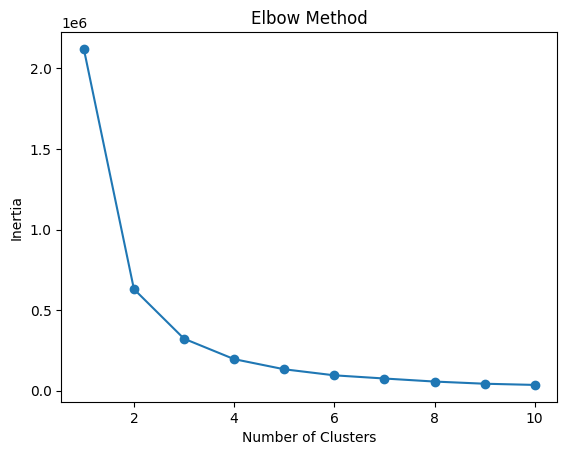

In [1]:
    #### TASK 6 #####
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
# read csv file
df=pd.read_csv('/content/drive/MyDrive/sql coursework-new/CarSharing.csv')

#fill null values using interpolate()
null_columns=['temp', 'temp_feel', 'humidity', 'windspeed']
df.loc[:, null_columns]=df.loc[:, null_columns].interpolate()

# Convert 'timestamp' column to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for the year 2017
df_2017 = df[df['timestamp'].dt.year == 2017]

# Extract humidity data
data = df_2017['humidity'].values.reshape(-1, 1)

inertias = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


#clusters=3